#**Universidad Galileo**
##Statistical Learning II Tarea No 1 
###César Luis Polanco
###20062088


In [ ]:
#Cargar libreria
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import os
import random
from sklearn.mixture import GaussianMixture

## Obtener datos

In [ ]:
#Mount Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = "/content/drive/MyDrive/CDP/SL2"
os.chdir( dir)

In [ ]:
data = pd.read_excel('estaturas.xlsx', sheet_name='normales')
data.head()

,Estatura(metros),Edad(años)
0,1.77,26.0
1,1.74,31.0
2,1.72,24.0
3,1.78,34.0
4,1.65,32.0


In [ ]:
data.describe()

,Estatura(metros),Edad(años)
count,46.000000,46.000000
mean,1.732609,29.521739
std,0.075349,6.708996
min,1.550000,21.000000
25%,1.685000,25.000000
50%,1.730000,27.500000
75%,1.777500,32.750000
max,1.900000,53.000000


## Función Hard-Cluster K-means

In [ ]:
def hard_cluster_kmeans(df,k):

  m = df.shape[0]  # Numero de Observaciones
  n = df.shape[1]  # Numero de Features
  clusters = {}         # Inicializar los clusters

  centroids = np.array([]).reshape(n,0)     # Inicializar los centroides
  elbow = np.array([])
  for i in range(k):
    random_centroids = random.randint(0, m-1)
    centroids = np.c_[centroids, df.iloc[random_centroids]]

  # Iterar centroides
  dist = np.array([]).reshape(m, 0)
  for i in range(k):
    temp_dist = np.sum((df - centroids[:,i])**2, axis=1)
    dist = np.c_[dist, temp_dist] 
    elbow = np.append(elbow,sum(np.min(dist,axis=1))/len(df))
  min_dist_index = np.argmin(dist, axis=1) + 1
  clusters = {}
  for i in range(k):
    clusters[i+1] = np.array([]).reshape(n,0)

  for i in range(m):
    clusters[min_dist_index[i]] = np.c_[clusters[min_dist_index[i]], df.iloc[i]]
      
  for i in range(k):
    clusters[i+1] = clusters[i+1].T #Transponer
      
  for i in range(k):
    centroids[:,i] = np.mean(clusters[i+1],axis=0)

  return clusters, centroids,elbow

In [ ]:
df = data
m = df.shape[0]  # Numero de Observaciones
n = df.shape[1]  # Numero de Features
clusters = {}         # Inicializar los clusters

In [ ]:
centroids = np.array([]).reshape(n,0)     # Inicializar los centroides
elbow = np.array([])
for i in range(8):
  random_centroids = random.randint(0, m-1)
  centroids = np.c_[centroids, df.iloc[random_centroids]]


In [ ]:
# Iterar centroides
for i in range(100):
  dist = np.array([]).reshape(m, 0)
  for i in range(8):
    temp_dist = np.sum((df - centroids[:,i])**2, axis=1)
    dist = np.c_[dist, temp_dist]

  

In [ ]:
np.min(dist,axis=1)

array([1.014400e+00, 0.000000e+00, 1.004900e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 4.900000e-03,
       1.040000e+00, 1.601000e+01, 4.006400e+00, 1.960000e-02,
       1.028900e+00, 0.000000e+00, 1.960000e-02, 3.600000e-03,
       1.002500e+00, 6.400000e-03, 1.000100e+00, 1.210000e-02,
       0.000000e+00, 3.600040e+01, 4.000000e-02, 1.028900e+00,
       1.600090e+01, 2.500000e-03, 1.210000e-02, 1.010000e+00,
       1.600000e-03, 1.000100e+00, 1.004900e+00, 1.062500e+00,
       1.600000e-03, 1.001600e+00, 3.610025e+02, 1.000100e+00,
       1.006400e+00, 9.006400e+00, 4.006400e+00, 8.101690e+01,
       1.004900e+00, 1.210000e-02, 1.002500e+00, 2.250049e+02,
       1.002500e+00, 1.001600e+00])

In [ ]:
min_dist_index = np.argmin(dist, axis=1) + 1
elbow = np.append(elbow,np.sum(np.min(min_dist_index,axis=0))/len(df))

In [ ]:
elbow

array([0.02173913])

## Función para graficar los cluster

In [ ]:
def plot_clustered_data(clusters, centroids,k):
  for i in range(k):
      plt.scatter(clusters[i+1][:,0], clusters[i+1][:,1], label="Cluster "+str(i+1))
  plt.scatter(centroids[0,:], centroids[1,:], s=100, c="red", label="Centroids")
  plt.xlabel("Estatura (m)")
  plt.ylabel("Edad (años)")
  plt.title("Data con "+str(k)+" cluster")
  plt.legend()
  plt.show()

## Revisión de algoritmo

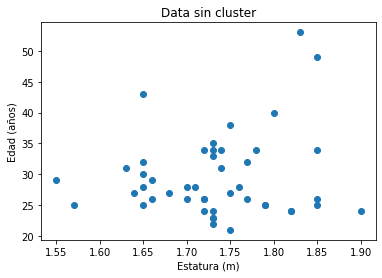

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.xlabel("Estatura (m)")
plt.ylabel("Edad (años)")
plt.title("Data sin cluster")
plt.show()

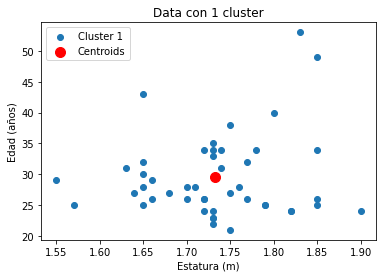

In [ ]:
k = 1   # Numero de Clusters
clusters, centroids,elbow = hard_cluster_kmeans(data,k)
plot_clustered_data(clusters, centroids,k)

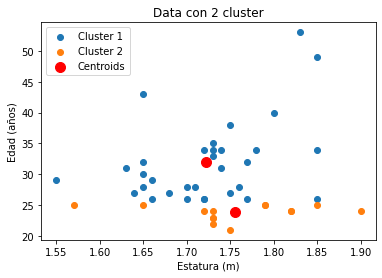

In [ ]:
k = 2   # Numero de Clusters
clusters, centroids,elbow = hard_cluster_kmeans(data,k)
plot_clustered_data(clusters, centroids,k)

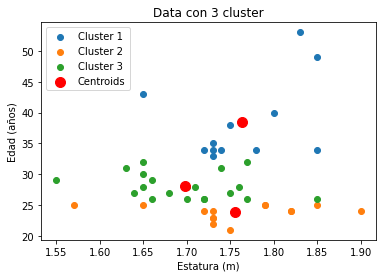

In [ ]:
k = 3   # Numero de Clusters
clusters, centroids,elbow = hard_cluster_kmeans(data,k)
plot_clustered_data(clusters, centroids,k)

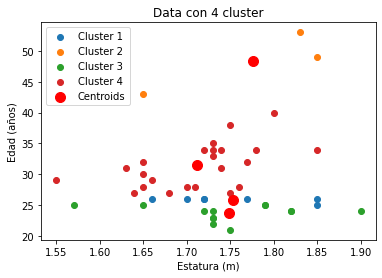

In [ ]:
k = 4   # Numero de Clusters
clusters, centroids,elbow = hard_cluster_kmeans(data,k)
plot_clustered_data(clusters, centroids,k)

## Elbow Method

De acuerdo con la teoría, este método utiliza la distancia media de las observaciones a su centroide (distancias intra-cluster). Cuanto más grande es el número de clusters k, la varianza intra-cluster tiende a disminuir.

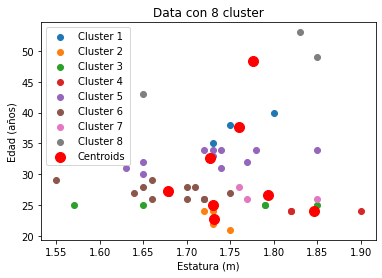

In [ ]:
k = 8   # Numero de Clusters
clusters, centroids,elbow = hard_cluster_kmeans(data,k)
plot_clustered_data(clusters, centroids,k)

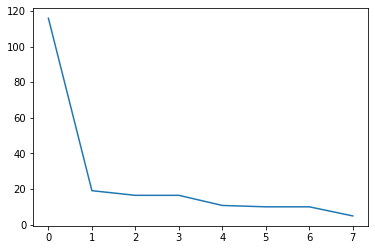

In [ ]:
plt.plot(elbow)

Por motivo de gráfica, se empleó un k=8, pero en la misma gráfica se peude observar que 2 cluster sería una buena recomendación para el problema presentado.

## Implementación Sklearn GMM

In [ ]:
def plot_GMM(gmm, df):
  clusters = gmm.predict(df)
  plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters)
  plt.scatter(gmm.means_[:,0], gmm.means_[:,1], s=100, c="red", label="Centroids")
  plt.xlabel("Estatura (m)")
  plt.ylabel("Edad (años)")
  plt.title("GMM")
  plt.legend()
  plt.show()

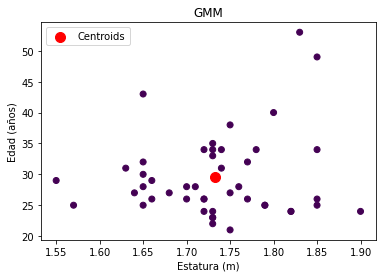

In [ ]:
k = 1   # Numero de Clusters
gmm = GaussianMixture(n_components=k, random_state=0).fit(data)
plot_GMM(gmm, data)

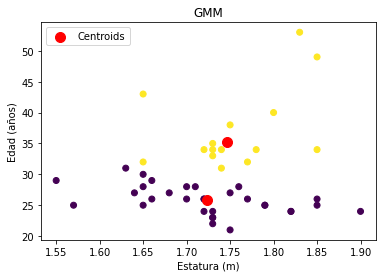

In [ ]:
k = 2   # Numero de Clusters
gmm = GaussianMixture(n_components=k, random_state=0).fit(data)
plot_GMM(gmm, data)

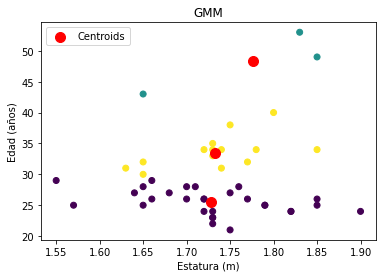

In [ ]:
k = 3   # Numero de Clusters
gmm = GaussianMixture(n_components=k, random_state=0).fit(data)
plot_GMM(gmm, data)

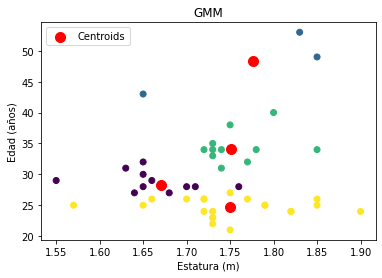

In [ ]:
k = 4   # Numero de Clusters
gmm = GaussianMixture(n_components=k, random_state=0).fit(data)
plot_GMM(gmm, data)

## Validación de datos (Valtest Normales)

In [ ]:
data_test = pd.read_excel('estaturas.xlsx', sheet_name='valtest(normales)')
data_test.head()

,Estatura(metros),Edad(años)
0,1.82,25.0
1,1.80,27.0
2,1.60,31.0
3,1.60,35.0
4,1.82,30.0


In [ ]:
data_test.describe()

,Estatura(metros),Edad(años)
count,8.000000,8.000000
mean,1.725000,30.250000
std,0.102539,3.058945
min,1.600000,25.000000
25%,1.607500,29.250000
50%,1.775000,31.000000
75%,1.805000,31.250000
max,1.820000,35.000000


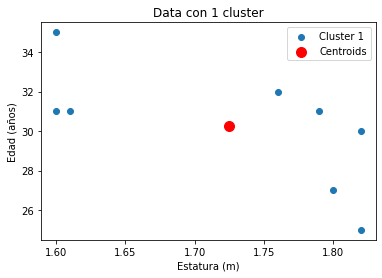

In [ ]:
k = 1   # Numero de Clusters
clusters, centroids,elbow = hard_cluster_kmeans(data_test,k)
plot_clustered_data(clusters, centroids,k)

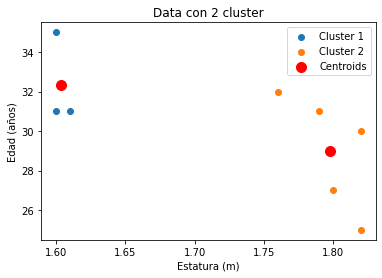

In [ ]:
k = 2   # Numero de Clusters
clusters, centroids,elbow = hard_cluster_kmeans(data_test,k)
plot_clustered_data(clusters, centroids,k)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


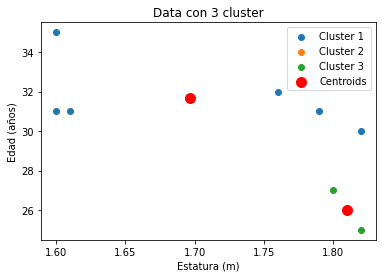

In [ ]:
k = 3   # Numero de Clusters
clusters, centroids,elbow = hard_cluster_kmeans(data_test,k)
plot_clustered_data(clusters, centroids,k)

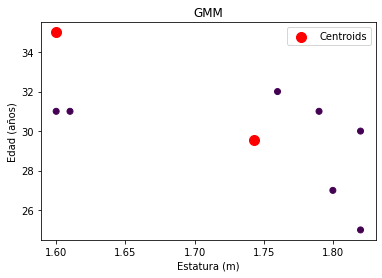

In [ ]:
k = 2   # Numero de Clusters
gmm = GaussianMixture(n_components=k, random_state=0).fit(data_test)
plot_GMM(gmm, data_test)

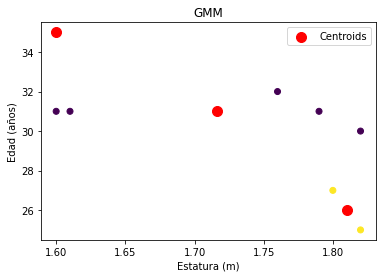

In [ ]:
k = 3   # Numero de Clusters
gmm = GaussianMixture(n_components=k, random_state=0).fit(data_test)
plot_GMM(gmm, data_test)

In [ ]:
print("PDF de la observación:")
np.exp(gmm.score_samples(data_test))

PDF de la observación:


array([2.41318816e+01, 2.41318816e+01, 7.65334738e-01, 1.98943679e+04,
       3.56174965e-01, 3.56175446e-01, 1.24316973e+00, 8.75913811e-01])

In [ ]:
print("Cluster por obsevación:")
gmm.predict(data_test)

Cluster por obsevación:


array([2, 2, 0, 1, 0, 0, 0, 0])

## Método del codo para Valtest

Para la data de prueba tiene un comportamiento confuso, pero siguiendo la guia de lectura de la gráfica; se sugiere usar 2 cluster máximo.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


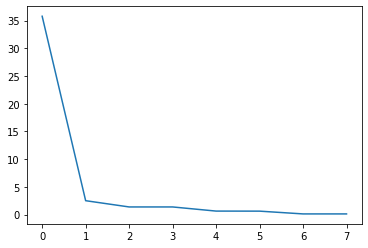

In [ ]:
k = 8   # Numero de Clusters
clusters, centroids,elbow = hard_cluster_kmeans(data_test,k)
plt.plot(elbow)

## Conclusiones

Al analizar el centroide de cada cluster se puede observar que la distancia entre ellos es muy pequeña por lo que utilizar más de 3 cluster resultaría un problema de clasificación.

El objetivo de hacer clustering es minimizar la varianza intra-cluster y maximizar la varianza inter-cluster. En este caso, eso no se logra a la perfección dado que las distancias son muy cortas. Como se explicó en el punto anterior cuando se intenta realizar para más de 3 cluster se puede llevar una mala categorización.